# Course

## Cookiecutter

To follow up the course use our repository template for a new use case.

Afterwards you can download guidelines and the dataset for the course with `make course`.
Instructions as follows:
```bash
pip install cookiecutter
git clone https://github.com/satellogic/iquaflow-use-case-cookiecutter
cookiecutter cookiecutter-iqf-use-case
cd project_name
make course
make build
make notebookshell
```

You can set a custom port to raise the notebook with the argument `NB_PORT=xxxx` just after `make notebookshell`.

If you are in a remote machine remember to tunnel the port so that you can access the browser from *localhost*

## Quality Check (QC)

The Quality Check in iquaflow is done with the modules of **SanityCheck** and **DSStatistics** are the classes that will perform sanity check and statistics of image datasets and ground truth. They are stand alone classes, it is to say they can work by proving the path folder of images and ground truth, or they can work with **DSWrapper** class.

In [2]:
import os
import json
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

from IPython.display import Image, display

### Statistics and exploration

There are several statistics that can be calculated from the datasets, they can be estimated and summariezed in visualizations. The resulting calculated parameters can be exported as json and the plots as images. The default location is in a subfolder *stats* within the dataset. The module *DsStats* performs stats to image datasets and annotations. It can either work as standalone class or with DSWrapper class.

In [3]:
from iquaflow.ds_stats import DsStats
from iquaflow.sanity import SanityCheck

### A) COCO-like annotations

 - DsStats has a wide range of methods for calculating certain statistics. 
 - See an example where the average area ratio covered for each annotation (with respect to the image area) is estimated.

In [4]:
your_input_folder_here             = 'course_data/ds_coco_dataset'
your_statistics_output_folder_here = 'course_data/ds_coco_dataset/statistics'

In [5]:
dss = DsStats(
    data_path   = your_input_folder_here,
    output_path = your_statistics_output_folder_here
)

stats = dss.perform_stats()

In [6]:
stats[2]

{'file': 'course_data/ds_coco_dataset/coco_annotations.json',
 'obj': 'area_coverage_by_class',
 'stats': {'background': 0.6045334161699303,
  'motorcycle': 0.004809992759627526,
  'person': 0.23025261017124524,
  'bicycle': 0.0002473900134154041,
  'knife': 0.0013741397125655364,
  'cake': 0.016101207208806815,
  'sink': 0.0022001441761363627,
  'cow': 0.018467746130952385,
  'umbrella': 0.0055450368235930745,
  'mouse': 0.002326543232443495,
  'keyboard': 0.010605611279902134,
  'tv': 0.01246539763659623,
  'cat': 0.0018014411251183712,
  'bottle': 0.0017547060110396605,
  'potted plant': 0.0011422376745975381,
  'refrigerator': 0.009386716308593753,
  'clock': 0.00027072511245265145,
  'spoon': 0.0008101865412832762,
  'bowl': 0.004220484571570562,
  'orange': 0.000569680693655303,
  'oven': 0.014942997928503787,
  'handbag': 0.001225641098484849,
  'wine glass': 0.0031224585506706426,
  'dining table': 0.03399393860023547,
  'cup': 0.00015331172008445655,
  'backpack': 0.0006342725

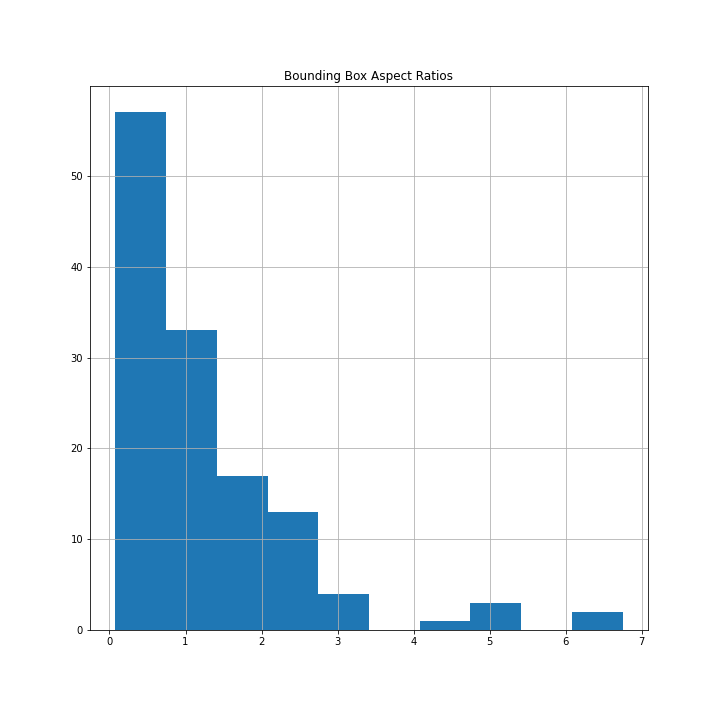

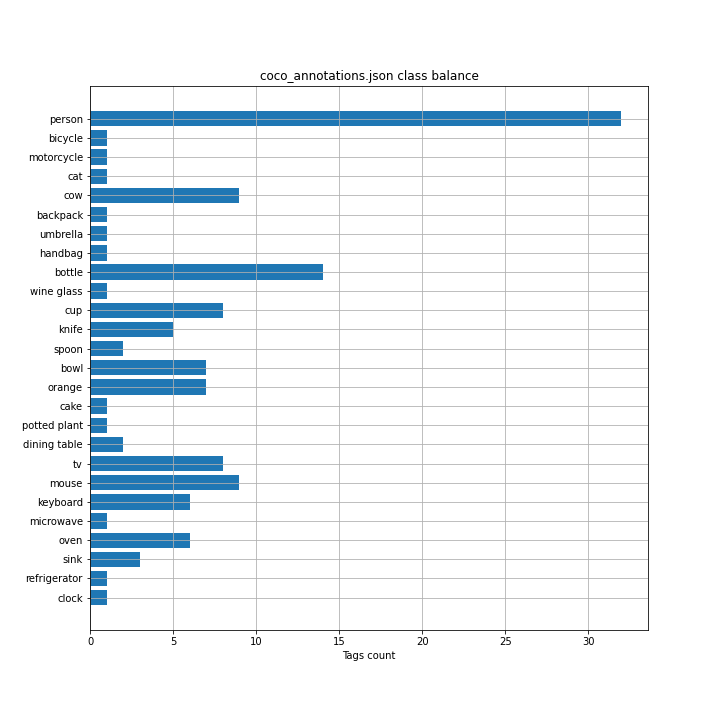

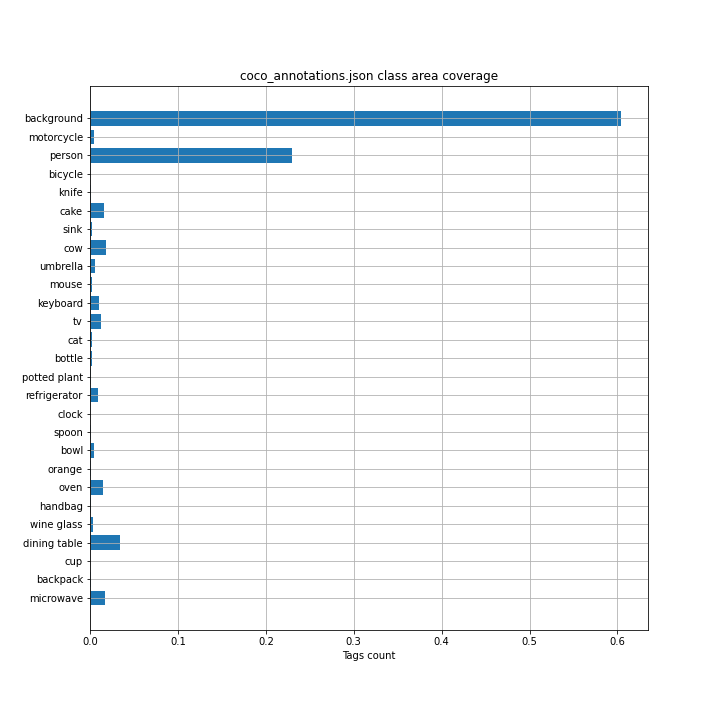

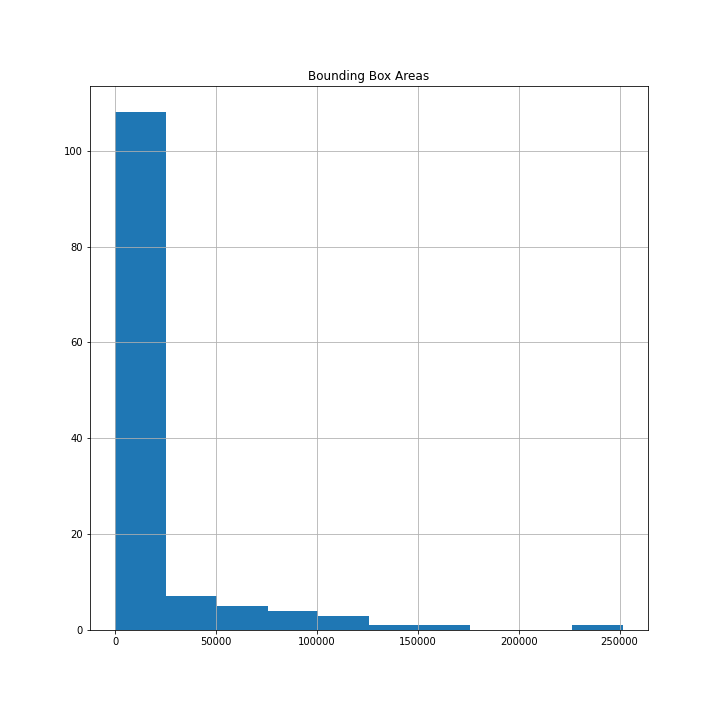

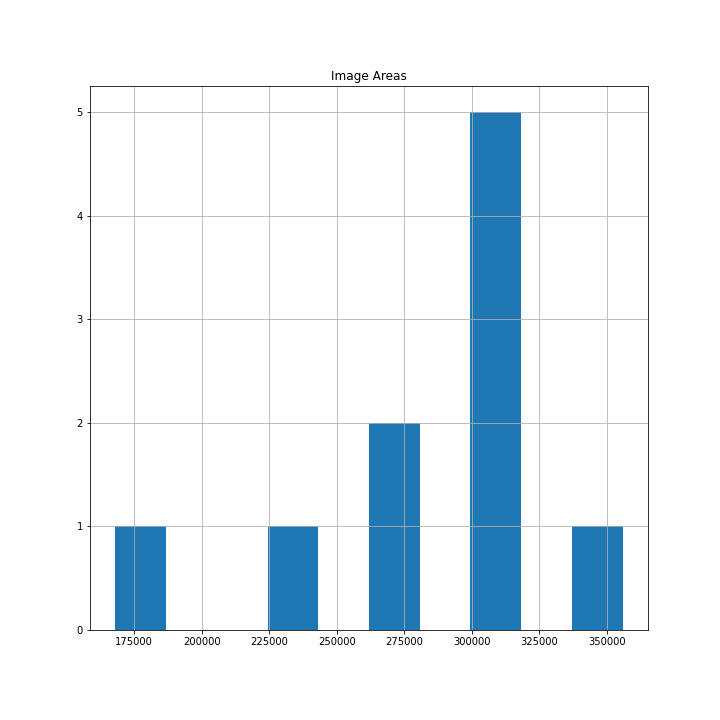

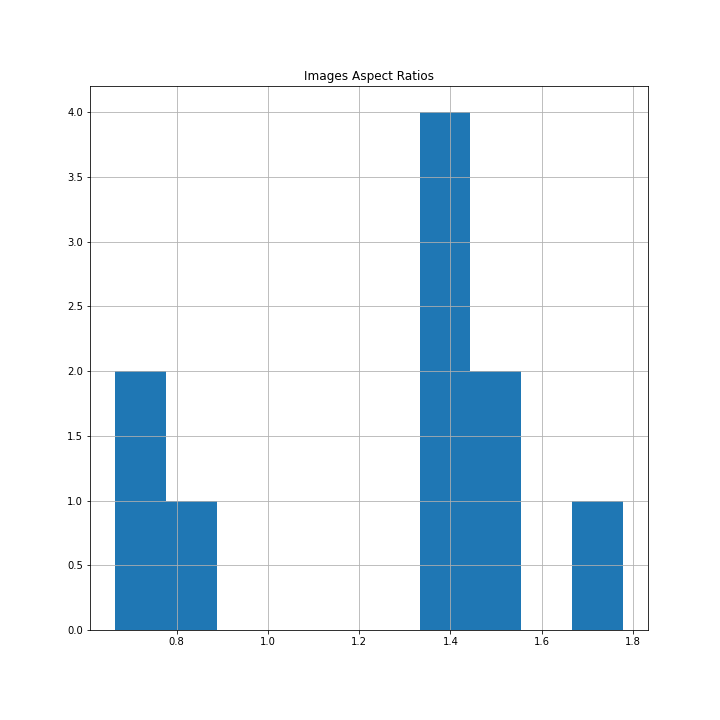

In [7]:
for imfn in glob.glob(os.path.join(
    your_statistics_output_folder_here,
    'images/*.png'
)):
    display(Image(filename=imfn))

### B) Geojson annotations

In [8]:
your_input_folder_here            = "course_data/ds_geo_dataset"
your_sanitized_output_folder_here = "course_data/ds_geo_dataset" # overwrite it

In [13]:
gdf = gpd.read_file("course_data/ds_geo_dataset/annots.geojson")
gdf.head()

,image_filename,class_id,geometry
0,sample_geotiff_734006_3725139.tif,0.0,"POLYGON ((0.000 0.000, 0.000 3.000, 3.000 3.00..."
1,None,0.0,"POLYGON ((733736.803 3725049.000, 733736.610 3..."
2,sample_geotiff_733601_3725139.tif,0.0,None
3,sample_geotiff_734006_3724779.tif,NaN,"POLYGON ((734011.306 3724738.998, 734020.363 3..."
4,sample_geotiff_734006_3725139.tif,0.0,"POLYGON ((0.000 0.000, 0.000 3.000, 3.000 3.00..."


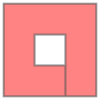

In [18]:
gdf.geometry[0]

### Sanity check

The SanityCheck module performs sanity to image datasets and ground truth. It can either work as standalone class or with DSWrapper class. It will remove all corrupted samples following the logic in the argument flags. The new sanitized dataset is located in output_path attribute from the SanityCheck instance. 

In [19]:
sc = SanityCheck(
    data_path   = your_input_folder_here,
    output_path = your_sanitized_output_folder_here
)

sc.autofix()

9 Problems found:
[{'err_file': 'course_data/ds_geo_dataset/annots.geojson', 'err_obj': 'images', 'err_sbi': 4, 'err_code': 'ERR_JSON_IMG_FNAME_DUP', 'err_txt': 'Duplicate file_name "sample_geotiff_734006_3725139.tif" (id:"4") already in list with id:0'}, {'err_file': 'course_data/ds_geo_dataset/annots.geojson', 'err_obj': 'images', 'err_sbi': 10, 'err_code': 'ERR_JSON_IMG_FNAME_DUP', 'err_txt': 'Duplicate file_name "sample_geotiff_733916_3724869.tif" (id:"10") already in list with id:9'}, {'err_file': 'course_data/ds_geo_dataset/annots.geojson', 'err_obj': 'images', 'err_sbi': 12, 'err_code': 'ERR_JSON_IMG_FNAME_DUP', 'err_txt': 'Duplicate file_name "sample_geotiff_734006_3725139.tif" (id:"12") already in list with id:0'}, {'err_file': 'course_data/ds_geo_dataset/annots.geojson', 'err_obj': 'images', 'err_sbi': 13, 'err_code': 'ERR_JSON_IMG_FNAME_DUP', 'err_txt': 'Duplicate file_name "sample_geotiff_734006_3725139.tif" (id:"13") already in list with id:0'}, {'err_file': 'course_data/d

In [21]:
gdf = gpd.read_file("course_data/ds_geo_dataset/annots.geojson")
gdf.head()

,image_filename,class_id,geometry
0,sample_geotiff_734006_3725139.tif,0.0,"POLYGON ((0.000 0.000, 0.000 3.000, 3.000 3.00..."
1,sample_geotiff_734006_3725139.tif,0.0,"POLYGON ((0.000 0.000, 0.000 3.000, 3.000 3.00..."
2,sample_geotiff_734006_3725004.tif,0.0,"POLYGON ((734019.900 3724959.000, 734019.516 3..."
3,sample_geotiff_733871_3725094.tif,0.0,"POLYGON ((733892.678 3725094.000, 733892.969 3..."
4,sample_geotiff_733646_3724914.tif,0.0,"POLYGON ((733646.000 3724884.255, 733646.398 3..."


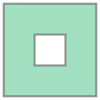

In [22]:
gdf.geometry[0]

In [ ]:
for imfn in glob.glob(os.path.join(
    your_statistics_output_folder_here,
    'images/*.png'
)):
    display(Image(filename=imfn))

### Statistics

In [23]:
dss = DsStats(
    data_path   = your_input_folder_here,
    output_path = your_statistics_output_folder_here
)

stats = dss.perform_stats()

perform geojson stats here


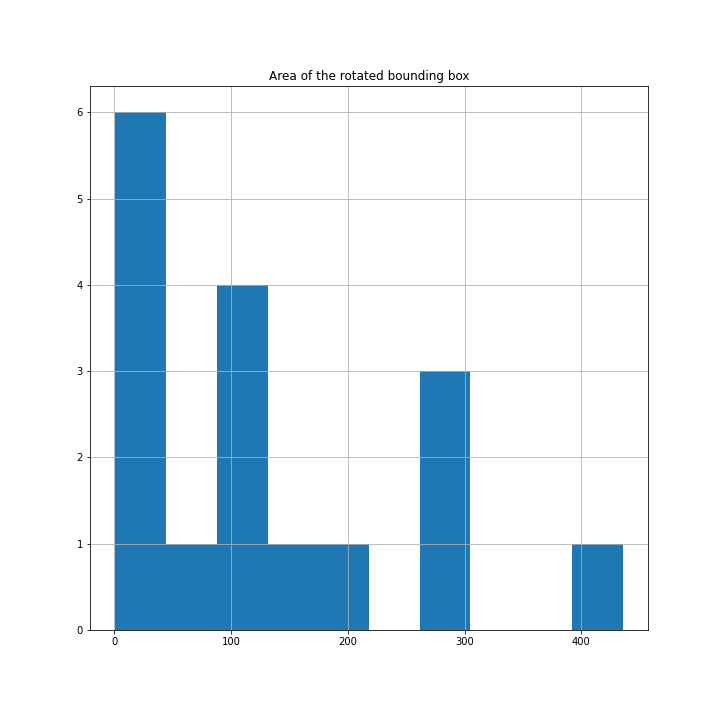

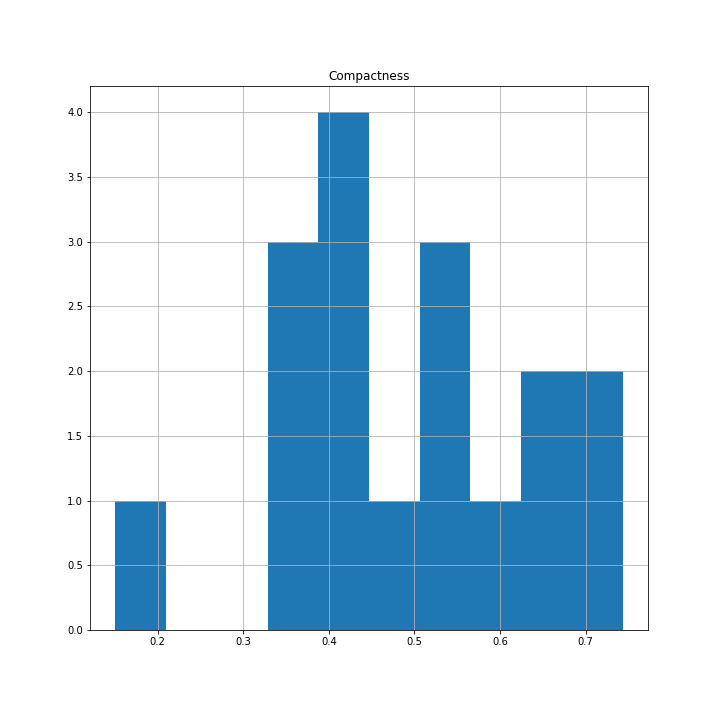

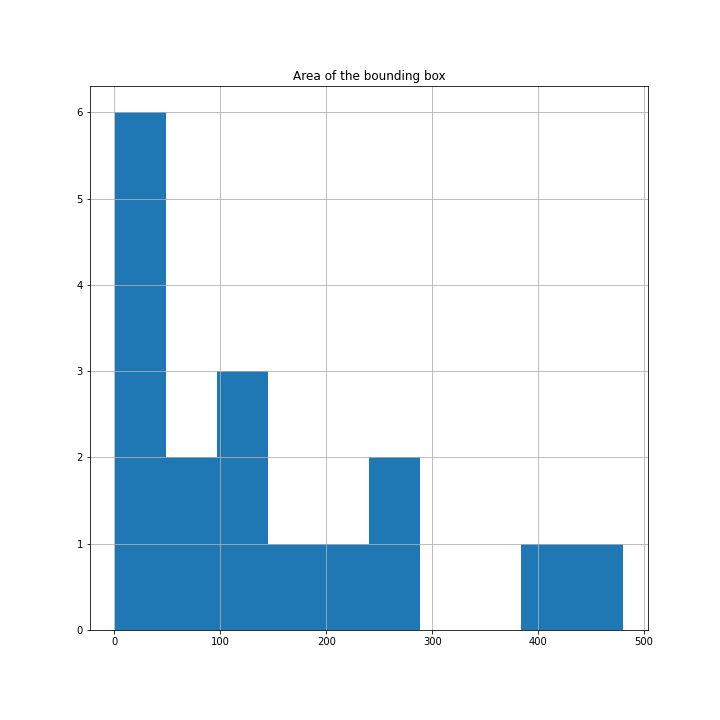

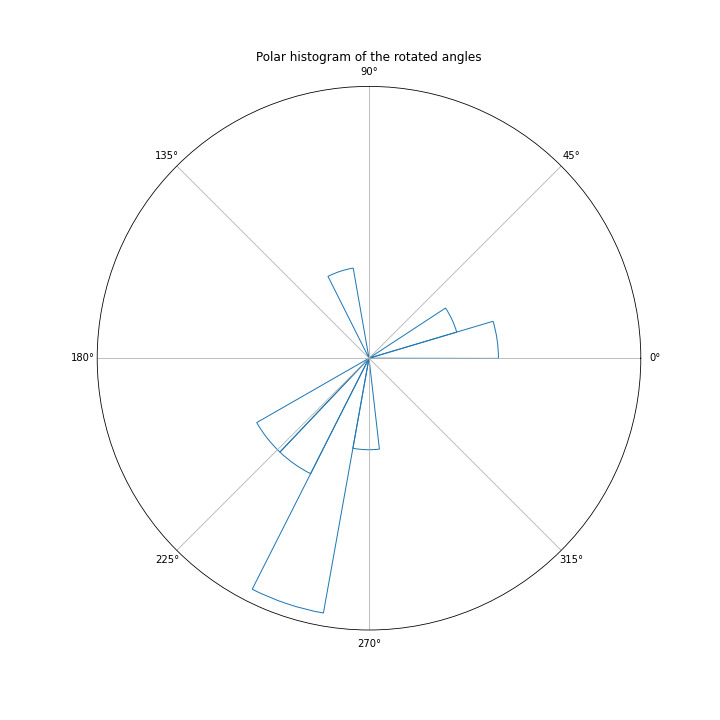

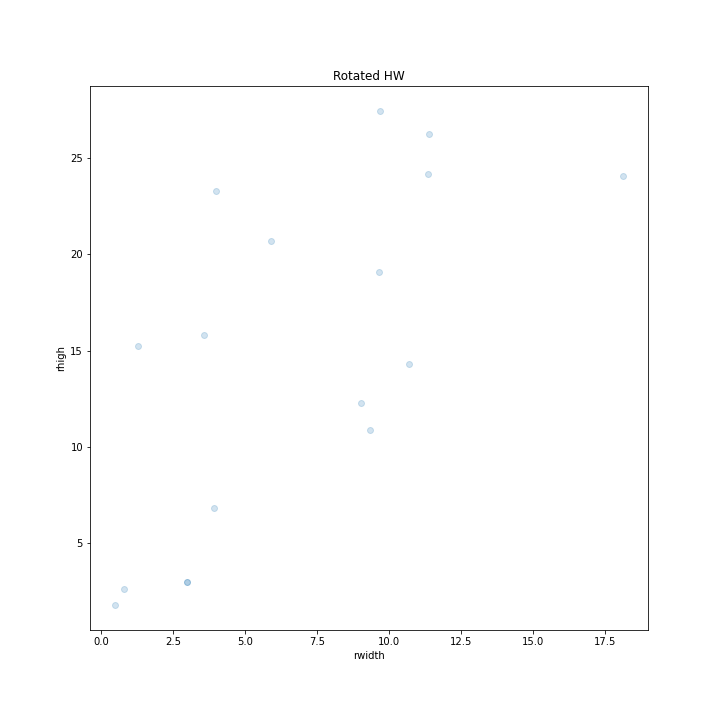

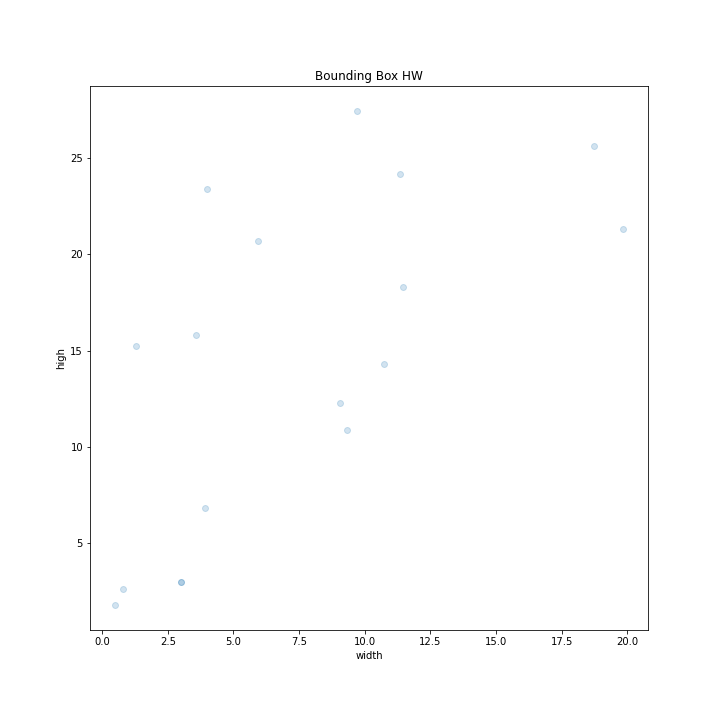

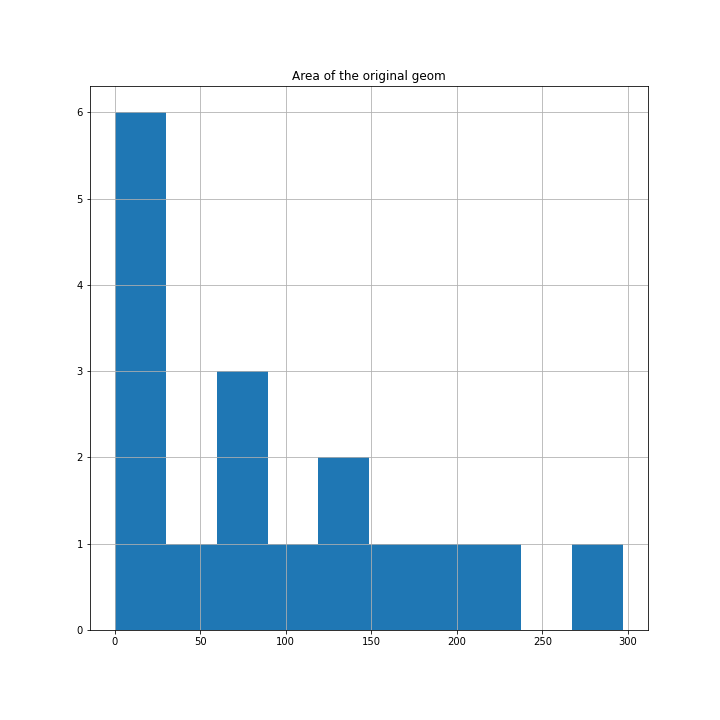

In [24]:
for imfn in glob.glob(os.path.join(
    your_statistics_output_folder_here,
    'images/*.png'
)):
    display(Image(filename=imfn))

### Interactive QC tools

In [26]:
your_input_folder_from_geojson_dataset_here = "course_data/ds_geo_dataset"
your_output_interactive_html_here           = "stats.html"

In [27]:
df = gpd.read_file(os.path.join(your_input_folder_from_geojson_dataset_here, "annots.geojson"))

# Add more features to explore...

df['area']   = df.area
df['rrarea'] = [p.minimum_rotated_rectangle.area for p in df['geometry']]
df['length'] = [p.length for p in df['geometry']]

In [ ]:
DsStats.notebook_annots_summary(
    df,
    export_html_filename=your_output_interactive_html_here,
    fields_to_include=[
        "image_filename",
        "class_id",
        "area"
    ]
)

Now download the interactive HTML and play with it

## Modifiers

In [4]:
import os
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

### IQF Modifier - JPEG compressor

Make a modified dataset that is a jpeg compressed from the {original_ds_img_dir}.

An example on how to use a modifier:

```python
from iquaflow.datasets import DSModifier_jpg
jpg85 = DSModifier_jpg(params={"quality": 85})
jpg85.modify(data_input="test_datasets/ds_coco_dataset/images")
```

### Custom modifier

Code your own custom modifier in the file **custom_iqf.py**.

You can add the below function (add noise to an image) in the file  **custom_iqf.py** and call it in the method **_mod_img** of your modifier.

```python
import numpy as np

def add_noise( img, mean=0, std=10 ):
    """This function adds noise to an img array"""
    row,col,ch= img.shape
    noise = np.random.normal(mean,std,(row,col,ch))
    return img + noise.reshape(row,col,ch)
```
--------------
Reminder > A basic custom modifier is build like this:

```python
from typing import Optional, Dict, Any
from iquaflow.datasets import DSModifier, DSModifier_dir

class MyCustomModifier(DSModifier_dir):
    def __init__(
       self,
       ds_modifier: Optional[DSModifier] = None,
       params: Dict[str, Any] = {"myparam": 65},
    ):
        self.name = ????????
        self.params: Dict[str, Any] = params
        self.ds_modifier = ds_modifier
        self.params.update({"modifier": "{}".format(self._get_name())})

    def _mod_img(self, img: np.array) -> np.array:
        # YOUR ARRAY MODIFICATION HERE
        return rec_img
```

### Use the cookiecutter scipts

Import your modifier from **custom_iqf.py**.

Then use it, make a modified dataset.

In [6]:
original_ds_img_dir = "course_data/ds_coco_dataset/images"

from custom_iqf import MyCustomModifier

MyCustomModifier().modify(data_input=original_ds_img_dir)

('course_data/ds_coco_dataset#noise/images',
 'course_data/ds_coco_dataset#noise',
 'course_data')

Then observe the result in some images:

In [7]:
YOUR_MODIFIER_SUFFIX = '#noise'

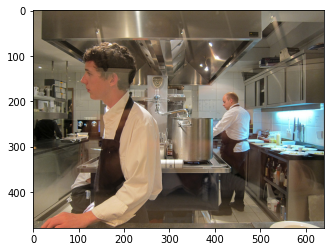

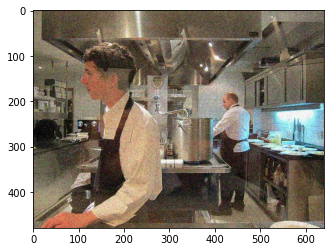

In [8]:
for sufix in [
    '',
    YOUR_MODIFIER_SUFFIX
]:
    plt.imshow(cv2.imread(f"course_data/ds_coco_dataset{sufix}/images/000000005802.jpg")[...,[2,1,0]])
    plt.show()

### Experiment

In [4]:
data_path_train      = "./course_data/mnist_png/training"
data_path_validation = "./course_data/mnist_png/validation"

from iquaflow.datasets import DSWrapper

ds_train = DSWrapper(data_path=data_path_train)
ds_vali  = DSWrapper(data_path=data_path_validation)

In [5]:
from iquaflow.datasets import DSModifier, DSModifier_jpg

list_of_modifiers = [     DSModifier_jpg()    ]

### Review the **train.py** script


Adapt the user script _**train.py**_ to make it compliant with IQF training script.
To do so, check:
1. **Input arguments** (you might need to rename and add any missing)
2. **Output format** When the metrics are reported a _**results.json**_ file should be written in the output path. To do so, you can add code at the end of the train.py script to write the json.
------------
Reminder > The required input arguments to make it compliant are: **trainds**, **valds**, **outputpath**

------------
Reminder > To write a json:

```python
import json

with open('xxx/results.json', 'w') as outfile:
    json.dump(data, outfile)
```
------------
Reminder > the results.json should be in the following format:

```python
{
   'epochs':100,
   'batch_sz':15,
   'lr':0.001,
   'P':[0.101,0.28,0.7,0.91,0.95,0.998],
   'R':[0.1,0.28,0.33,0.6,0.95,0.978]
}
```

### Define the TaskExecution

In [6]:
from iquaflow.experiments.task_execution import PythonScriptTaskExecution

In [7]:
task = PythonScriptTaskExecution(model_script_path='./train.py')

### Populate arguments of the ExperimentSetup

Set n_epochs=1 for the extra_train_params. Its value will be a list of variations along parameter n_epochs. Set just 1 variation of n_epochs=1.

In [8]:
from iquaflow.experiments import ExperimentSetup

experiment = ExperimentSetup(
   experiment_name    = 'myexperimentname',
   task_instance      = task,
   ref_dsw_train      = ds_train,
   ref_dsw_val        = ds_vali,
   ds_modifiers_list  = list_of_modifiers,
   extra_train_params = {'n_epochs':[1]}
)

## Execute the experiment

The output should be similar to:

```
****** IQF subprocess --stdout-- *********
Getting dataloaders...
Building model...
Start training...
*********************
epoch		0
train_loss		2.2098962545394896
vali_loss		1.718320608139038
trainloss 2.2098962545394896 0
trainloss 2.2098962545394896 0
valiloss 1.718320608139038 0
valiloss 1.718320608139038 0

****** IQF subprocess --stderr-- *********
100%|██████████| 10/10 [00:23<00:00,  2.32s/it]
100%|██████████| 1/1 [00:00<00:00, 10.74it/s]
```

In [9]:
experiment.execute()

## _ExperimentInfo_ to collect results

In this example we pick up a pre-executed experiment under the name _experiment_name_.
The experiment records were saved locally within _mlruns_ folder

In [1]:
from iquaflow.experiments import ExperimentInfo, ExperimentVisual

In [2]:
experiment_name = 'iq-mnist-use-case'

In [3]:
experiment_info = ExperimentInfo(experiment_name)

In [4]:
experiment_info.runs

{'training#noise_32': {'run_id': 'cf69cb978e4f46708cf0e304f5ca62b4',
  'run_status': 'FINISHED',
  'params_dict': {'sigma_val': '32',
   'sigma': '32',
   'mod': 'noise_32',
   'modifier_val': 'noise_32',
   'modifier': 'noise_32',
   'batch_sz': '640',
   'ds_name': 'training#noise_32',
   'n_epochs': '10',
   'learning_rate': '0.01',
   'ds_name_val': 'validation#noise_32'},
  'metrics_dict': {'valiloss': 2.6813082695007324,
   'trainloss': 2.2984459400177},
  'artifact_path': '/iqf/mlruns/1/cf69cb978e4f46708cf0e304f5ca62b4/artifacts',
  'output_pred_path': '/iqf/mlruns/1/cf69cb978e4f46708cf0e304f5ca62b4/artifacts/output.json'},
 'training#noise_32_0': {'run_id': 'f570321023554e7bbba78099633d4b0d',
  'run_status': 'FINISHED',
  'params_dict': {'sigma_val': '32',
   'sigma': '32',
   'mod': 'noise_32',
   'modifier_val': 'noise_32',
   'modifier': 'noise_32',
   'batch_sz': '640',
   'ds_name': 'training#noise_32',
   'n_epochs': '10',
   'learning_rate': '0.01',
   'ds_name_val': 'va

In [5]:
df = experiment_info.get_df(
    ds_params=["modifier"],
    metrics=["valiloss",'trainloss'],
    dropna = True,
    fields_to_float_lst = ["valiloss",'trainloss']
)

In [6]:
df

,name,ds_modifier,valiloss,trainloss
0,training#noise_32,noise_32,2.681308,2.298446
1,training#noise_32_0,noise_32,2.296979,2.302494
2,training#noise_32_1,noise_32,2.312005,2.301789
3,training#noise_32_2,noise_32,2.219452,2.286424
4,training#noise_32_3,noise_32,2.330611,2.301200
...,...,...,...,...
93,training#noise_4_10,noise_4,2.011085,2.007693
94,training#noise_2_10,noise_2,1.899925,1.983159
95,training#noise_1_10,noise_1,1.732569,1.723388
96,training#noise_0.5_10,noise_0.5,1.955796,1.629139


In [7]:
ev = ExperimentVisual(df)

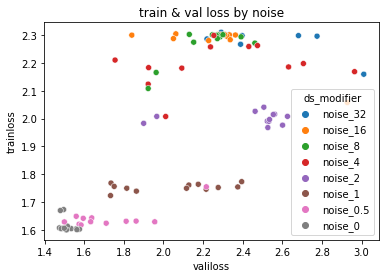

In [8]:
ev.visualize(
    plot_kind='scatter',
    xvar='valiloss',
    yvar='trainloss',
    legend_var='ds_modifier',
    title='train & val loss by noise'
)

## Visualizations

This shows some basic visualizations offered by iquaflow.

They use dataframes as inputs, these dataframes can be generated by the **get_df** method from the **ExperimentInfo**

In [9]:
from examples import *

In [10]:
df1 = sample_df("agg1")
ev = ExperimentVisual(df1)

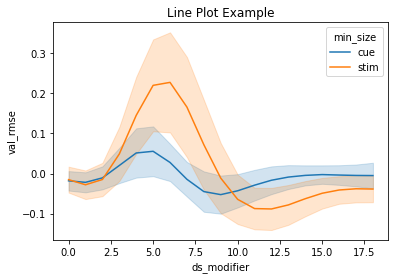

In [11]:
ev.visualize(
    plot_kind='lineplot',
    xvar='ds_modifier',
    yvar='val_rmse',
    legend_var='min_size',
    title='Line Plot Example'
)

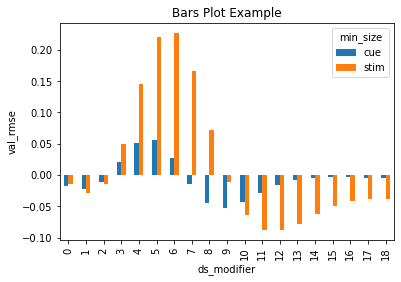

In [12]:
ev.visualize(
    plot_kind='bars',
    xvar='ds_modifier',
    yvar='val_rmse',
    legend_var='min_size',
    title='Bars Plot Example'
)

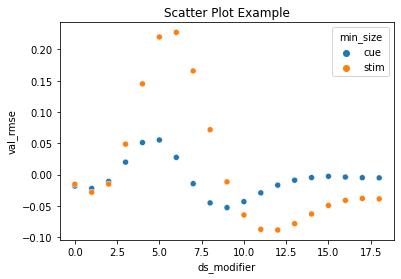

In [13]:
ev.visualize(
    plot_kind='scatter',
    xvar='ds_modifier',
    yvar='val_rmse',
    legend_var='min_size',
    title='Scatter Plot Example'
)

In [14]:
df2 = sample_df("agg2")
ev2 = ExperimentVisual(df2)

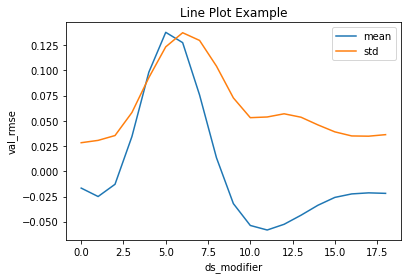

In [15]:
ev2.visualize(
    plot_kind='lineplot',
    xvar='ds_modifier',
    yvar='val_rmse',
    legend_var='min_size',
    title='Line Plot Example',
    plot_mean_std=True,
)

In [16]:
df3 = sample_df("ROC")
ev3 = ExperimentVisual(df3)

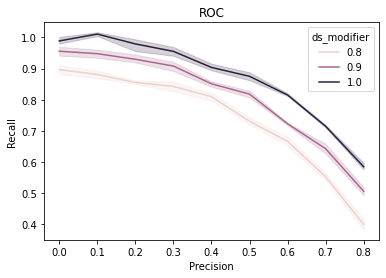

In [17]:
ev3.visualize(
    xvar="Precision",
    yvar="Recall",
    legend_var="ds_modifier",
    title="ROC"
)